# Spotify Track Dataset (Kurzfassung)

- **track_id**: Spotify-ID des Tracks
- **artists**: Namen der Künstler, getrennt durch `;`.
- **album_name**: Name des Albums.
- **track_name**: Titel des Tracks.
- **popularity**: Beliebtheit (0–100), basierend auf Wiedergaben und Aktualität.
- **duration_ms**: Länge in Millisekunden.
- **explicit**: Enthält explizite Inhalte (`true`/`false`).
- **danceability**: Eignung zum Tanzen (0.0–1.0).
- **energy**: Intensität und Aktivität (0.0–1.0).
- **key**: Tonart (0 = C, 1 = C♯/D♭, …, -1 = keine).
- **loudness**: Lautstärke in dB.
- **mode**: Tonart (1 = Dur, 0 = Moll).
- **speechiness**: Anteil gesprochener Wörter (0.0–1.0).
- **acousticness**: Wahrscheinlichkeit, dass der Track akustisch ist (0.0–1.0).
- **instrumentalness**: Wahrscheinlichkeit, dass der Track ohne Gesang ist (0.0–1.0).
- **liveness**: Wahrscheinlichkeit einer Live-Aufnahme (0.0–1.0).
- **valence**: Stimmung des Tracks (positiv/negativ, 0.0–1.0).
- **tempo**: Tempo in BPM (Schläge pro Minute).
- **time_signature**: Taktart (3 = 3/4, 4 = 4/4, …).
- **track_genre**: Genre des Tracks.

In [7]:
import pandas as pd
import seaborn as sns
import seaborn.objects as so

dataFrm = pd.read_csv("./res/dataset.csv", na_values=['Not Provided'])
dataFrm.sample(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
28007,28007,2eFjKl5cyPPYElDByCh6Tb,ILLENIUM;iann dior,First Time,First Time,62,165779,False,0.526,0.667,...,-5.451,1,0.0437,0.05050,0.0000,0.3210,0.4300,155.085,4,dub
6335,6335,6YTxw9D17XpnJnujgCqJgX,Këkht Aräkh,Night & Love,As the Wounds Gently Bleed,19,229955,False,0.383,0.879,...,-8.046,1,0.0658,0.06920,0.8890,0.0954,0.0405,141.741,4,black-metal
2013,2013,6QvYmrqFKRSVrcVgvoA7Ar,Red Hot Chili Peppers,All That Really Matters - Just Hits,Tippa My Tongue,4,260808,False,0.573,0.913,...,-6.520,0,0.0409,0.00861,0.0273,0.1140,0.7950,88.418,4,alt-rock


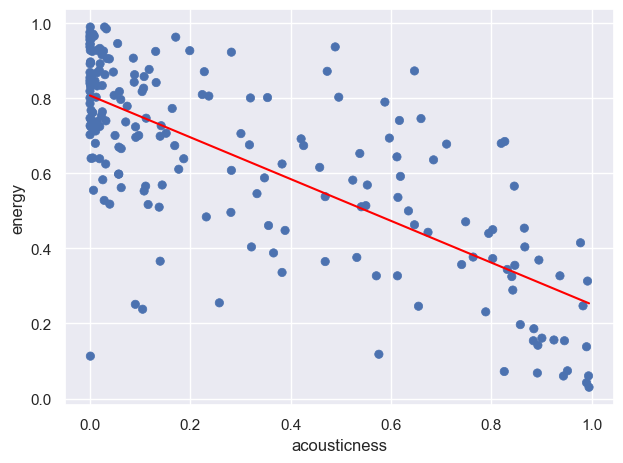

In [21]:

so.Plot(dataFrm.sample(200), x="acousticness", y="energy").add(
    so.Dot()  # Linie für die Regressionsanpassung
).add(so.Line(color='red'), so.PolyFit(order=1)).label(
    xlabel="X-Werte",
    ylabel="Y-Werte"
).scale(
    color_continuous="#1f77b4"  # Optionale Anpassung der Farbe
).show()


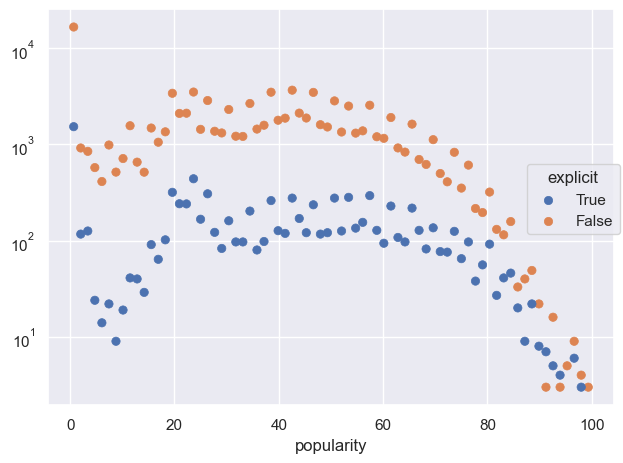

In [10]:
so.Plot(dataFrm, x="popularity", color="explicit").add(
    so.Dot(), so.Hist(),
).scale(
    y="log",  # Logarithmische Skalierung der y-Achse
    color_continuous="#1f77b4"  # Optionale Farbanpassung
).show()


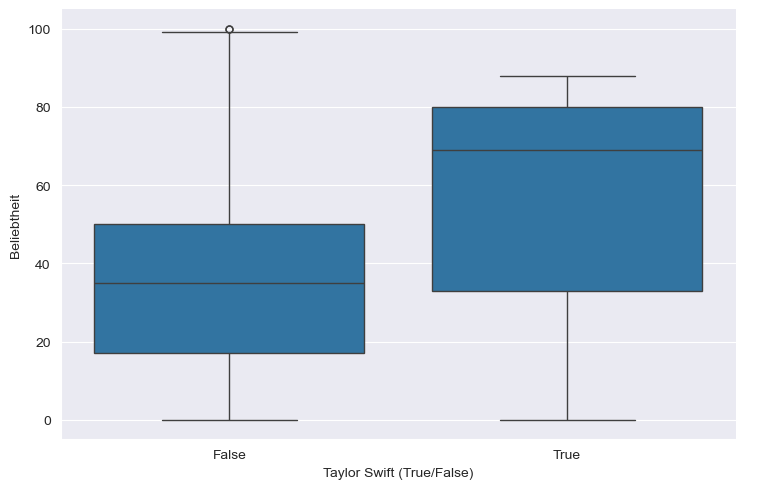

In [34]:
# Filter für Taylor Swift
taylor_swift = dataFrm[dataFrm['artists'].str.contains("Taylor Swift", na=False)]
others = dataFrm[~dataFrm['artists'].str.contains("Taylor Swift", na=False)]

# Neue Spalte für Gruppen
dataFrm['is_taylor'] = dataFrm['artists'].str.contains("Taylor Swift", na=False)

# Diagramm
sns.catplot(
    data=dataFrm,
    x='is_taylor',
    y='popularity',
    kind='box',
    aspect=1.5,
).set_axis_labels("Taylor Swift (True/False)", "Beliebtheit")



In [0]:
# Scatterplot für Danceability vs. Popularity
sns.relplot(
    data=dataFrm,
    x='danceability',
    y='popularity',
    hue='valence',
    palette='coolwarm',
    height=5,
    aspect=1.5
).set_axis_labels("Danceability", "Beliebtheit").set(title="Einfluss von Danceability und Stimmung auf Popularität")

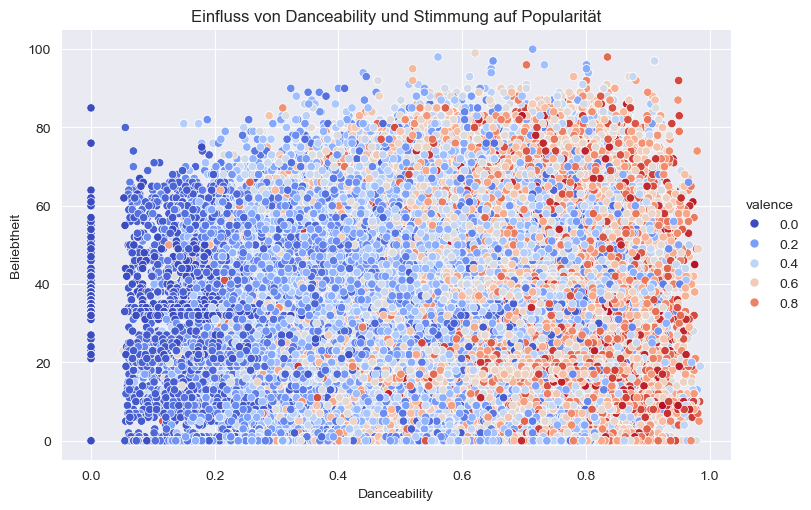